In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import os
import requests
import string
import tweepy
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

## Gather the Data

We will obtain data from three sources, a manually downloaded csv file, a programmatically downloaded tsv file and data scraped from the Twitter API.

### Twitter Archive

In [3]:
archive = pd.read_csv('twitter_archive_enhanced.csv')

### Image Predictions

In [4]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# Get data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
# Create file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [7]:
predictions = pd.read_csv('image_predictions.tsv', sep='\t')

### API Data

In [9]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'xxdBiDhNaPJxb1yPZPzWbX3Q3dqJ50S2nACd53EBCh4YZ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
# Get tweet info
tweet = api.get_status(archive.tweet_id[2000], tweet_mode='extended')

In [11]:
# Get json info
info = tweet._json

In [12]:
info['retweet_count']

442

In [13]:
info['favorite_count']

1108

In [14]:
info['user']['followers_count']

8177545

In [15]:
print(datetime.datetime.now().time())

17:13:47.959412


In [16]:
# Make file if it doesn't already exist
file_name = 'tweet_json.txt'
if not os.path.isfile(file_name):
    open(file_name, 'w').close()

In [17]:
tweet_ids = archive.tweet_id

In [18]:
tweet_errors = {}
tweet_count = 1
data = []
for tweet_id in tweet_ids:
    try:
        # Print id counter
        print(tweet_count)
        # Collect tweet info
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        info = tweet._json
        #print(info) # debug test
        #break # debug test
        # Append to file
        data.append(info)
        with open(file_name, 'w') as file:
            json.dump(data, file)
        # Print timer info to estimate time until wake-up
        print(datetime.datetime.now().time())
        # Add one to the tweet count for further printing
        tweet_count += 1
        
    except Exception as e:
        # Print exception info and add to tweet_errors dict
        print(str(tweet_id) + ": " + str(e))
        tweet_errors[str(tweet_count - 1) + "_" + str(tweet_id)] = info

1
17:13:57.080195
2
17:13:57.309170
3
17:13:57.519543
4
17:13:57.683943
5
17:13:57.905455
6
17:13:58.121506
7
17:13:58.305070
8
17:13:58.529832
9
17:13:58.698498
10
17:13:58.876084
11
17:13:59.051592
12
17:13:59.332968
13
17:13:59.499865
14
17:13:59.732464
15
17:13:59.939073
16
17:14:00.118637
17
17:14:00.338856
18
17:14:00.515703
19
17:14:00.683470
20
888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
20
17:14:01.064976
21
17:14:01.273007
22
17:14:01.488819
23
17:14:01.908316
24
17:14:02.119205
25
17:14:02.305776
26
17:14:02.530944
27
17:14:02.762885
28
17:14:02.937458
29
17:14:03.186887
30
17:14:03.369607
31
17:14:03.598113
32
17:14:03.862911
33
17:14:04.100370
34
17:14:04.322842
35
17:14:04.515486
36
17:14:04.758490
37
17:14:04.978587
38
17:14:05.203960
39
17:14:05.388426
40
17:14:05.629194
41
17:14:05.845362
42
17:14:06.096418
43
17:14:06.276180
44
17:14:06.492193
45
17:14:06.752263
46
17:14:06.950856
47
17:14:07.176503
48
17:14:07.402826
49
17:14:07.67

KeyboardInterrupt: 

In [19]:
data = {}
data['tweets'] = []
tweet_errors = {}
tweet_count = 1
for tweet_id in tweet_ids:
    try:
        # Print id counter
        print(tweet_count)
        # Collect tweet info
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        info = tweet._json
        # Collect specific data
        retweet_count = info['retweet_count']
        favorite_count = info['favorite_count']
        followers_count = info['user']['followers_count']
        # Append to data dict
        data['tweets'].append({
            'tweet_id': tweet_id, 
            'retweet_count': retweet_count, 
            'favorite_count': favorite_count,
            'followers_count': followers_count
        })
        #print(retweet_count, favorite_count, followers_count) # debug test
        #print(data)
        #break # debug test
        # Print timer info to estimate time until wake-up
        print(datetime.datetime.now().time())
        # Add one to the tweet count for further printing
        tweet_count += 1
        
    except Exception as e:
        # Print exception info and add to tweet_errors dict
        print(str(tweet_count) + "_" + str(tweet_id) + ": " + str(e))
        tweet_errors[str(tweet_count) + "_" + str(tweet_id)] = info

1
Rate limit reached. Sleeping for: 291
17:28:34.818532
2
17:28:34.983276
3
17:28:35.173700
4
17:28:35.350540
5
17:28:35.525221
6
17:28:35.733258
7
17:28:35.952502
8
17:28:36.167415
9
17:28:36.356217
10
17:28:36.537560
11
17:28:36.726916
12
17:28:36.887321
13
17:28:37.079111
14
17:28:37.236289
15
17:28:37.433467
16
17:28:37.611239
17
17:28:37.780685
18
17:28:37.941303
19
17:28:38.135001
20
20_888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
20
17:28:38.519171
21
17:28:38.689904
22
17:28:38.881582
23
17:28:39.105308
24
17:28:39.331117
25
17:28:39.500771
26
17:28:39.660640
27
17:28:39.833268
28
17:28:40.002232
29
17:28:40.227119
30
17:28:40.404474
31
17:28:40.573311
32
17:28:40.815035
33
17:28:41.023219
34
17:28:41.194934
35
17:28:41.410883
36
17:28:41.575556
37
17:28:41.741706
38
17:28:41.920714
39
17:28:42.145566
40
17:28:42.314932
41
17:28:42.484258
42
17:28:42.658612
43
17:28:42.816970
44
17:28:42.992285
45
17:28:43.162418
46
17:28:43.322594
47
17:28:43

KeyboardInterrupt: 

In [20]:
# Extract data from file
df_list = []
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for tweet in data:
        df_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'], 
                        'favorite_count': tweet['favorite_count'],
                        'followers_count': tweet['user']['followers_count']})

In [21]:
# Create DataFrame from list of dictionaries
api_data = pd.DataFrame(df_list, columns = ['tweet_id', 
                                            'retweet_count', 
                                            'favorite_count', 
                                            'followers_count'])

In [22]:
tweet_errors.keys()

dict_keys(['20_888202515573088257', '95_873697596434513921', '100_872668790621863937', '102_872261713294495745', '115_869988702071779329', '128_866816280283807744', '150_861769973181624320', '176_856602993587888130', '204_851953902622658560', '239_845459076796616705', '244_844704788403113984', '250_842892208864923648', '285_837366284874571778', '286_837012587749474308', '350_829374341691346946', '368_827228250799742977', '491_812747805718642688', '550_802247111496568832', '767_775096608509886464', '800_770743923962707968'])

# Assess the Data

### Archive Table

In [23]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [24]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
# Count number of not 'None' values in columns 'doggo' to 'puppo'
(archive.loc[:,'doggo':'puppo'] != 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [26]:
# Count number of cells of `text` with doggo, floofer, pupper, and puppo
for column in archive.columns[-4:]:
    print(column, archive.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


In [27]:
# Check if name is always captured
archive[['text', 'name']].sample(10)

,text,name
1704,This is Cheesy. It's her birthday. She's patie...,Cheesy
1038,This is Blanket. She has overthrown her human....,Blanket
2149,After countless hours of research and hundreds...,None
966,This is Zoe. She was trying to stealthily take...,Zoe
368,This is Fiona. She's an exotic dog. Seems rath...,Fiona
26,This is Maya. She's very shy. Rarely leaves he...,Maya
2081,Can't do better than this lol. 10/10 for the o...,None
441,This is Howie. He just bloomed. 11/10 revoluti...,Howie
1322,When you're just relaxin and having a swell ti...,None
1473,What kind of person sends in a pic without a d...,None


In [28]:
# Identify example of missing name
archive.text[1265]

'WeRateDogs stickers are here and they\'re 12/10! Use code "puppers" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r'

In [29]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Daisy          7
an             7
Toby           7
Bailey         7
Stanley        6
Koda           6
Leo            6
Jax            6
Scout          6
Bella          6
Oscar          6
Dave           6
Milo           6
Jack           6
Rusty          6
Chester        5
            ... 
Mo             1
Billl          1
Bradlay        1
Barclay        1
Kingsley       1
Stewie         1
Andy           1
Jennifur       1
Trigger        1
Marlee         1
Cheryl         1
Tebow          1
Iggy           1
Kendall        1
Sweet          1
Damon          1
Charleson      1
Huck           1
Tug            1
Jersey         1
Lulu           1
this           1
Kellogg        1
Bookstore      1
Duddles        1
Severus        1
Mitch          1
Corey         

In [30]:
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [31]:
archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

### predictions Table

In [32]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [33]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### api_data Table

In [34]:
api_data

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8103,37400,8177547
1,892177421306343426,6007,32150,8177547
2,891815181378084864,3979,24230,8177547
3,891689557279858688,8274,40707,8177547
4,891327558926688256,8962,38934,8177547
5,891087950875897856,2974,19556,8177547
6,890971913173991426,1971,11428,8177547
7,890729181411237888,18036,63048,8178071
8,890609185150312448,4078,26912,8177547
9,890240255349198849,7043,30848,8177547


In [35]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 4 columns):
tweet_id           879 non-null int64
retweet_count      879 non-null int64
favorite_count     879 non-null int64
followers_count    879 non-null int64
dtypes: int64(4)
memory usage: 27.5 KB


### Findings

#### _archive_ __Table__

-  Retweets are included in the dataset
-  Replies are included in the dataset
-  Erroneous datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo columns)
-  Missing info in expanded_urls
-  Nulls represented as "None" (str) for name, doggo, floofer, pupper, and puppo columns
-  Missing counts for doggo, floofer, pupper and puppo
-  Missing names identified from text in name e.g. index 1852 - Reggie
-  Some names identified are not names
-  text column includes both text and short version of link
-  Second name missing if two are mentioned, e.g. index 2232 - Bo & Smittens
-  Some extracted values for rating_numerator and rating_denominator seem to be in error

#### _predictions_ __table__

-  Erroneous datatype (tweet_id)
-  The lower number of entries means that some posts don't have images

#### _api_data_ __table__

-  Erroneous datatype (tweet_id)
-  Retweet and favorite information is not available for all tweets and cannot be retrieved

#### Tidiness

#### _archive_ __table__

-  There are multiple columns containing the same type of data, e.g. doggo, floofer, pupper and puppo all contain dog types

#### _predictions_ __table__

-  There are multiple columns containing the same type of data, e.g. p1, p2, p3 all contain dog breed predictions

#### _api_data_ __table__

-  This data is separate from the other tweet data

## Clean the Data

In [36]:
# Make copies to preserve the original datasets
archive_clean = archive.copy()
predictions_clean = predictions.copy()
api_data_clean = api_data.copy()

### Missing Data

There are four areas of missing data identified:

1. Missing info in expanded_urls
2. Missing counts for doggo, floofer, pupper and puppo
3. Missing names identified from text in name e.g. index 1852 - Reggie
4. Second name missing if two are mentioned, e.g. index 2232 - Bo & Smittens

I am not concerned about tracking down the missing url information because I don't plan to analyze it.

__Missing counts for__ doggo, floofer, pupper __and__ puppo __in__ _archive_ __table__

_The issue of Nulls represented as "None" (str) for doggo, floofer, pupper, and puppo columns is also able to be addressed here._

##### Define

Use for loop and .str.contains() to re-identify if text contains each column header. Include text if it is found. If not, return NaN.

##### Code


In [37]:
dog_types = list(archive_clean.iloc[:,-4:])
dog_types

['doggo', 'floofer', 'pupper', 'puppo']

In [38]:
def find_dog_type(df, dog_type):
    dog_list = []
    for row in df['text']:
        if dog_type in row:
            dog_list.append(dog_type)
        else:
            dog_list.append(np.NaN)
    return dog_list

In [39]:
for dog_type in dog_types:
    archive_clean[dog_type] = find_dog_type(archive, dog_type)

##### Test

In [40]:
# Check non-null data counts for columns
archive_clean[dog_types].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
doggo      98 non-null object
floofer    4 non-null object
pupper     272 non-null object
puppo      37 non-null object
dtypes: object(4)
memory usage: 73.7+ KB


In [41]:
# Compare to counts from text
for dog_type in dog_types:
    print(dog_type, archive_clean.text.str.contains(dog_type).sum())

doggo 98
floofer 4
pupper 272
puppo 37


The counts of what is found in the text strings matches what is found in the columns.

__Missing names identified from text in name in archive table__

The issues of Some names identified are not names and Nulls represented as "None" (str) for name can also be addressed here.

This would also be the place to address Second name missing if two are mentioned however I decided that this was too difficult for me to do.

##### Define

Create function to identify pet names and re-populate name column

##### Code

Pet names are capitalized, usually less than 10 characters but at least 2, and typically found before the first period. They typically only include letters and apostrophes and certain words are not usually used as pet names.


In [42]:
def find_names(df):
    name_list = []
    for row in df['text']:
        # Find first "."
        first_period = row.find(".")
        # If no period is found, assume there is no name
        if first_period == -1:
            name_list.append(np.NaN)
        else:
            # Find word before period
            word_before = row[:first_period].rsplit(' ', 1)[-1]
            # Check if word is capitalized
            if word_before == word_before.title():
                # Add exclusionary criteria - not more than 10 letters, not less than 2 letters, not in other_words, only alphanumeric
                other_words = ["This", "Xbox", "Oh", "Christmas", "Up", "Pupper", "Doggo", "Puppo", "Floofer"]
                if (len(word_before) > 10) or any(word in word_before for word in other_words) or any(c for c in word_before if c not in string.ascii_letters + "'") or (len(word_before) < 2):
                    name_list.append(np.NaN)
                else:
                    name_list.append(word_before)
            else:
                name_list.append(np.NaN)
        
    return name_list

In [43]:
name_list = find_names(archive_clean)
archive_clean.name = name_list

##### Test

In [44]:
# View names and NaNs
archive_clean.name.head(10)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
5         NaN
6         Jax
7         NaN
8        Zoey
9      Cassie
Name: name, dtype: object

In [45]:
# Check value counts for unexpected names
archive_clean.name.value_counts()

Charlie      14
Oliver       12
Cooper       11
Lucy         10
Lola         10
Tucker       10
Winston       9
Penny         9
Daisy         8
Buddy         7
Bailey        7
Bo            7
Scout         6
Bella         6
Stanley       6
Milo          6
Dave          6
Sadie         6
Koda          6
Rusty         6
Toby          6
Leo           6
Ruby          5
Jax           5
George        5
Bear          5
Louis         5
Larry         5
Phil          5
Loki          5
             ..
Snickers      1
Gerbald       1
Mo            1
Billl         1
Jiminus       1
Corey         1
Mitch         1
Shadoe        1
Kendall       1
Mary          1
Zoe           1
Mosby         1
Marlee        1
Cheryl        1
Tebow         1
Iggy          1
Flakes        1
Ginger        1
Damon         1
Severus       1
Charleson     1
Huck          1
Trigger       1
Tug           1
Lulu          1
Kellogg       1
Wylie         1
Henry         1
Duddles       1
Rolf          1
Name: name, Length: 961,

In [46]:
# Visually compare sample of results
archive_clean[['text', 'name']].sample(10)

,text,name
1126,Say hello to Ollie. He conducts this train. He...,Ollie
1127,"""Challenge completed"" \n(pupgraded to 12/10) h...",NaN
2295,This is Gabe. He is a southern Baklava. Gabe h...,Gabe
1414,This is Cuddles. He's not entirely sure how do...,Cuddles
1364,Say hello to Luna. Her tongue is malfunctionin...,Luna
1217,Just in case anyone's having a bad day. 12/10 ...,NaN
220,Say hello to Boomer. He's a sandy pupper. Havi...,Boomer
1497,PUPDATE: just noticed this dog has some extra ...,NaN
1476,This pupper is afraid of its own feet. 12/10 w...,NaN
759,RT @dog_rates: This is an East African Chalupa...,Seal


### Tidy Data

The next step is to address tidiness issues. Three were identified:

1. There are multiple columns containing the same type of data in the archive table, e.g. doggo, floofer, pupper, puppo
2. There are multiple columns containing the same type of data in the predictions table, e.g. p1, p2, p3 all contain dog breed predictions
3. The tweet data in the api_data table is separate from the other tweet data

__Multiple columns containing the same type of data in the _archive_ table__

There is a small amount of overlap, but I would rather the posts be classified once.

##### Define

Create a column called dog_type and merge all data in order of puppo, pupper, floofer, doggo using .fillna(). Drop the redundant columns.

##### Code

In [47]:
archive_clean['dog_type'] = archive_clean.puppo.fillna(archive_clean.pupper.fillna(archive_clean.floofer.fillna(archive_clean.doggo)))

In [48]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [49]:
# Confirm NaNs remain
archive_clean.dog_type.head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    doggo
Name: dog_type, dtype: object

In [50]:
# Check dog_type counts
archive_clean.dog_type.value_counts()

pupper     272
doggo       86
puppo       37
floofer      4
Name: dog_type, dtype: int64

The original count was:

-  doggo 98
-  floofer 4
-  pupper 272
-  puppo 37

So just lost 12 counts from doggo which seems acceptable to me.

In [52]:
# Confirm column drop
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type'],
      dtype='object')

__Multiple columns containing the same type of data in the predictions table__

##### Define

Change columns names for ease of use with pd.wide_to_long. Use pd.wide_to_long to

-  melt p1_conf, p2_conf, p3_conf to a confidence column
-  melt p1, p2, p3 to a prediction column
-  melt p1_dog, p2_dog, p3_dog to a dog column.

##### Code

In [53]:
# Change column names
col_names = ['tweet_id', 'jpg_url', 'img_num', 
             'prediction_1', 'confidence_1', 'dog_1', 
             'prediction_2', 'confidence_2', 'dog_2', 
             'prediction_3', 'confidence_3', 'dog_3']
predictions_clean.columns = col_names

In [54]:
# Convert wide to long
predictions_clean = pd.wide_to_long(predictions_clean, 
                                    stubnames=['prediction', 'confidence', 'dog'],
                      i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_order', sep='_')\
.reset_index()

##### Test

In [56]:
# Visual inspection
predictions_clean.head(9)

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True


In [57]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction_order    6225 non-null int64
prediction          6225 non-null object
confidence          6225 non-null float64
dog                 6225 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


In [58]:
# Compare count to original counts
6225/2075

3.0

Given that there are three predictions for each, it is expected that the length would increase by three times. This is what has occurred.

__Tweet data in the api_data table is separate from the other tweet data__

##### Define

Merge the data from api_data with the archive table

##### Code

In [59]:
archive_clean = pd.merge(left=archive_clean, right=api_data_clean, how='left', on='tweet_id')

##### Test

In [60]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8103.0,37400.0,8177547.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6007.0,32150.0,8177547.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3979.0,24230.0,8177547.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8274.0,40707.0,8177547.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,8962.0,38934.0,8177547.0


In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1531 non-null object
dog_type                      399 non-null object
retweet_count                 879 non-null float64
favorite_count                879 non-null float64
followers_count               879 non-null float64
dtypes: float64(7), int64(3), obj

### Data Quality

Some posts don't have images

##### Define

Remove any tweet ids in the archive table that aren't in the predictions table.

##### Code

In [62]:
# Confirm the number to be removed
no_image = (~archive_clean.tweet_id.isin(list(predictions_clean.tweet_id)))
no_image.sum()

281

In [63]:
# Remove non-shared tweet_id's
archive_clean = archive_clean[~no_image]

##### Test

In [64]:
# Confirm no tweet_id's without images
(~archive_clean.tweet_id.isin(list(predictions_clean.tweet_id))).sum()

0

In [65]:
# Confirm new archive_clean counts
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          1422 non-null object
dog_type                      338 non-null object
retweet_count                 722 non-null float64
favorite_count                722 non-null float64
followers_count               722 non-null float64
dtypes: float64(7), int64(3), object

__Replies and retweets are included in archive table__

##### Define

-  Identify rows that have info for in_reply_to_status_id or retweeted_status_id and remove from archive_clean.
-  Remove redundant columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).
-  Remove non-shared id's from predictions_clean

##### Code

In [66]:
# Check rows to remove for replies
replies = (~archive_clean.in_reply_to_status_id.isnull())
replies.sum()

23

In [67]:
# Remove replies
archive_clean = archive_clean[~replies]

In [68]:
# Check rows to remove for retweets
retweets = (~archive_clean.retweeted_status_user_id.isnull())
retweets.sum()

81

In [69]:
# Remove retweets
archive_clean = archive_clean[~retweets]

In [70]:
archive_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

In [71]:
# Identify tweet_ids in predictions not in archive
not_shared = (~predictions_clean.tweet_id.isin(list(archive_clean.tweet_id)))
not_shared.sum()

312

This makes sense because it is 3 times 104 (the number of rows that were removed from archive_clean).

In [72]:
predictions_clean = predictions_clean[~not_shared]

##### Test

In [74]:
# Confirm new archive_clean counts
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1367 non-null object
dog_type              322 non-null object
retweet_count         651 non-null float64
favorite_count        651 non-null float64
followers_count       651 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 200.2+ KB


In [75]:
2075 - (23 + 81)

1971

The expected number of rows were removed and the columns were removed.

In [76]:
# Confirm no unshared prection_clean tweet_id's with archive_clean
(~predictions_clean.tweet_id.isin(list(archive_clean.tweet_id))).sum()

0

text column in archive contains both text and short link

##### Define

Create a function to remove links and apply it to achive_clean.text.

##### Code

In [77]:
def remove_link(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x

In [78]:
archive_clean.text = archive_clean.text.apply(remove_link)

##### Test

In [79]:
# Print full text to check endings
for row in archive_clean.text[:5]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


__Values for rating_numerator are incorrect__

##### Define

Create a function that identifies the value before the last / in the text and uses this in the rating_numerator column. Manually correct any ratings that are not covered by the function.

##### Code


In [80]:
def find_numerator(x):
    # Ratings are associated with the last "/"
    slash = x.rfind("/")
    # Don't need to check for missing because original set only includes tweets with ratings
    # Most ratings are two digits, but if not, preceded by " ", "()" or "..."
    # Check for decimal
    try:
        if x[slash - 2] == ".":
            numerator = x[slash - 4:slash].strip()
            if numerator[0] == ".":
                numerator = numerator.strip("...").strip("..")
        else:
            numerator = x[slash - 2:slash].strip().strip("(")
        return float(numerator)
    # Manage strange formatting
    except ValueError:
        return np.NaN

In [81]:
archive_clean.rating_numerator = archive_clean.text.apply(find_numerator)

In [82]:
# Identify strange formatting
missing_numerator = list(archive_clean[archive_clean.rating_numerator.isnull()].index)
missing_numerator

[2216, 2246]

In [83]:
# Check full text for each
for index in missing_numerator:
    print(index, archive_clean.text[index])

2216 This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10
2246 This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10


One contains two ratings and one is a humerous expression related to the picture. I'm going to go with 8 and 10

In [84]:
archive_clean.at[missing_numerator[0], 'rating_numerator'] = 8
archive_clean.at[missing_numerator[1], 'rating_numerator'] = 10

##### Test

In [85]:
# Check all values are filled
archive_clean.rating_numerator.isnull().sum()

0

In [86]:
# Check range of values
archive_clean.rating_numerator.describe()

count    1971.000000
mean       10.893709
std         5.103397
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        99.000000
Name: rating_numerator, dtype: float64

Values seem more inline with expectations (most over 10 but not many 15 and over)

__Values for rating_denominator are incorrect__

##### Define

Create a function that identifies the value after the last / in the text and uses this in the rating_denominator column.

##### Code

In [87]:
def find_denominator(x):
    # Ratings are associated with the last "/"
    slash = x.rfind("/")
    # Don't need to check for missing because original set only includes tweets with ratings
    # Expect denominator to be two digits
    try:
        denominator = x[slash + 1:slash + 3]
        return float(denominator)
    # Manage strange formatting
    except ValueError:
        return np.NaN

In [88]:
archive_clean.rating_denominator = archive_clean.text.apply(find_denominator)

##### Test

In [89]:
# Check all values are filled
archive_clean.rating_denominator.isnull().sum()

0

In [90]:
# Check range of values
archive_clean.rating_denominator.describe()

count    1971.000000
mean       10.203957
std         3.483537
min         7.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        90.000000
Name: rating_denominator, dtype: float64

Most denominators are expected to be 10.

__Erroneous datatypes__

-  By melting the predictions table, an additional erroneous data type was created in the prediction_order column.
-  With the collapse of the columns in archive table to a single dog_type column, an additional erroneous data type was created in the column.

##### Define

archive_clean table:

-  tweet_id: change to str
-  timestamp: change to datetime
-  dog_type: categorical

predictions_clean table:

-  tweet_id: change to str
-  prediction_order: changet to categorical

##### Code

In [91]:
# Change tweet_id's
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

In [92]:
# Change timestamp
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [93]:
# Change dog_type and prediction order
archive_clean.dog_type = archive_clean.dog_type.astype("category")
predictions_clean.prediction_order = predictions_clean.prediction_order.astype("category")

##### Test

In [94]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1367 non-null object
dog_type              322 non-null category
retweet_count         651 non-null float64
favorite_count        651 non-null float64
followers_count       651 non-null float64
dtypes: category(1), datetime64[ns](1), float64(5), object(5)
memory usage: 266.9+ KB


In [95]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            5913 non-null object
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_order    5913 non-null category
prediction          5913 non-null object
confidence          5913 non-null float64
dog                 5913 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(3)
memory usage: 288.8+ KB


### Save Cleaned Data

In [96]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)
predictions_clean.to_csv('predictions_master.csv', index=False)

## Analyze and Visualize

In [97]:
archive = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('predictions_master.csv')

In [98]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1367 non-null object
dog_type              322 non-null object
retweet_count         651 non-null float64
favorite_count        651 non-null float64
followers_count       651 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 184.9+ KB


In [99]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id            5913 non-null int64
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_order    5913 non-null int64
prediction          5913 non-null object
confidence          5913 non-null float64
dog                 5913 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 283.0+ KB


All of the types have been lost with the conversion to and from csv so I need to re-run those.

In [100]:
# Change types
archive.tweet_id = archive.tweet_id.astype(str)
predictions.tweet_id = predictions.tweet_id.astype(str)
archive.dog_type = archive.dog_type.astype("category")
predictions.prediction_order = predictions.prediction_order.astype("category")
archive.timestamp = pd.to_datetime(archive.timestamp)

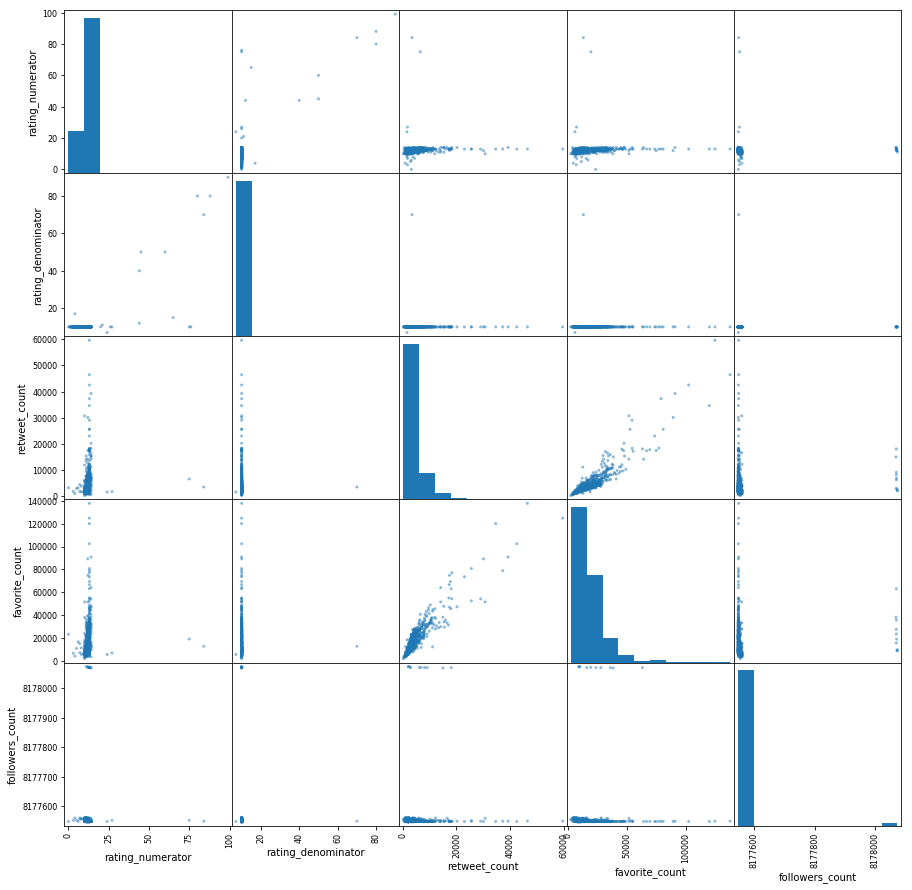

In [101]:
pd.plotting.scatter_matrix(archive.iloc[:, 1:], figsize=(15, 15));

### Retweet Counts

In [102]:
archive.retweet_count.describe()

count      651.000000
mean      4856.287250
std       5472.129673
min        161.000000
25%       2156.000000
50%       3338.000000
75%       5237.000000
max      59633.000000
Name: retweet_count, dtype: float64

In [103]:
def set_my_palette():
    sns.set()
    current_palette = sns.color_palette(my_palette)
    sns.set_palette(current_palette)

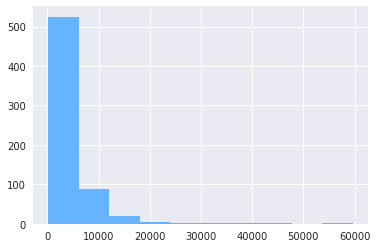

In [104]:
my_palette = ['#66b3ff', '#00cc99', '#ff6666', '#ffff66', '#8c66ff', '#66ffd9']
set_my_palette()
archive.retweet_count.hist();

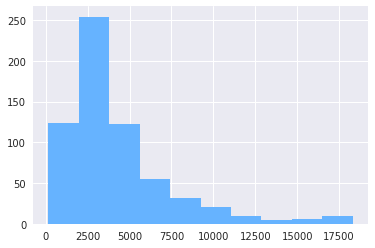

In [105]:
archive[archive.retweet_count <= 20000].retweet_count.hist();

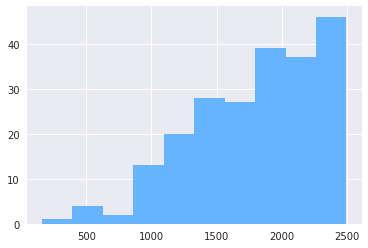

In [106]:
archive[archive.retweet_count <= 2500].retweet_count.hist();

### Favorites Count

In [107]:
archive.favorite_count.describe()

count       651.000000
mean      18119.107527
std       14907.686436
min        1918.000000
25%        9117.000000
50%       13823.000000
75%       22262.500000
max      137725.000000
Name: favorite_count, dtype: float64

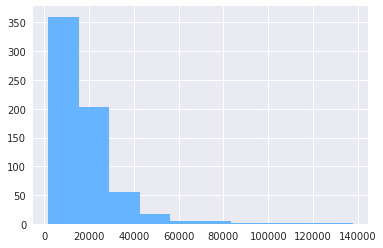

In [108]:
archive.favorite_count.hist();

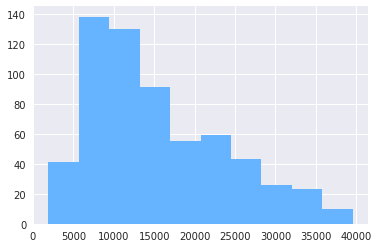

In [109]:
archive[archive.favorite_count <= 40000].favorite_count.hist();

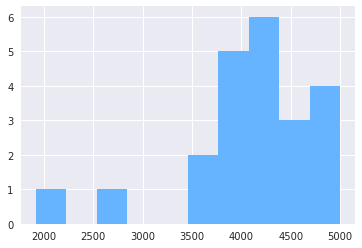

In [110]:
archive[archive.favorite_count <= 5000].favorite_count.hist();

### Most Popular Names

In [111]:
archive.name.value_counts().head(10)

Charlie    13
Oliver     11
Cooper     10
Lucy        9
Tucker      9
Daisy       8
Penny       8
Winston     8
Lola        7
Koda        6
Name: name, dtype: int64

### Over Time

__Followers__

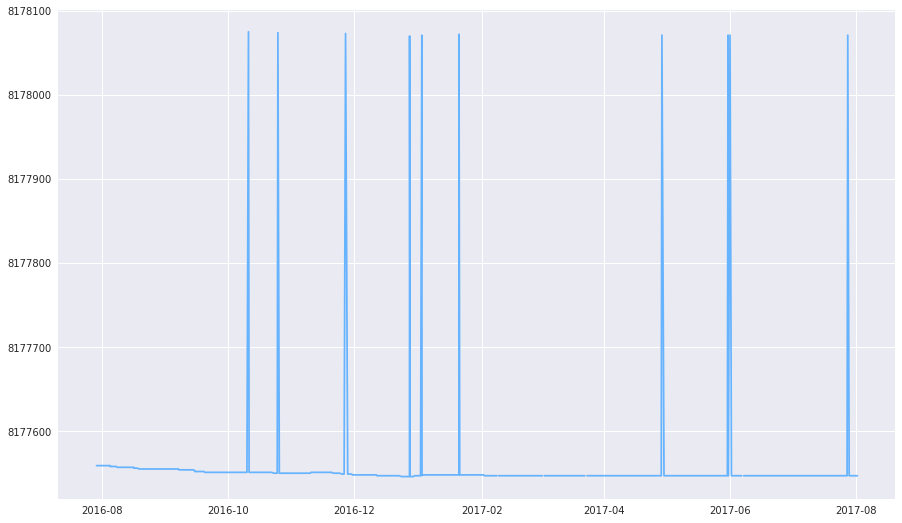

In [113]:
plt.subplots(figsize=(15, 9))
plt.plot(archive.timestamp, archive.followers_count);

In [114]:
archive.followers_count.describe()

count    6.510000e+02
mean     8.177557e+06
std      6.440795e+01
min      8.177546e+06
25%      8.177547e+06
50%      8.177548e+06
75%      8.177551e+06
max      8.178075e+06
Name: followers_count, dtype: float64

There are these strange spikes that don't seem to make sense. Can probably subset to just remove them as they correct back to the original values. Want to keep below 8177600.

In [122]:
follower_count = archive.query('followers_count < 8177600')

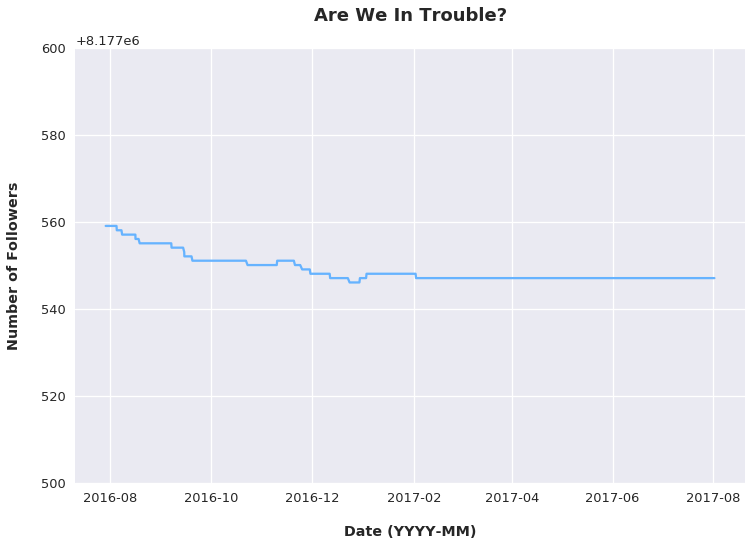

In [123]:
sns.set_context("talk")
plt.subplots(figsize=(12, 8))
plt.plot(follower_count.timestamp, follower_count.followers_count)
plt.ylim(8177500, 8177600)
plt.title('Are We In Trouble?\n', fontsize=18, weight='bold')
plt.xlabel('\nDate (YYYY-MM)', weight='bold')
plt.ylabel('Number of Followers\n', weight='bold');
plt.savefig('in-trouble.png')

#### Retweets

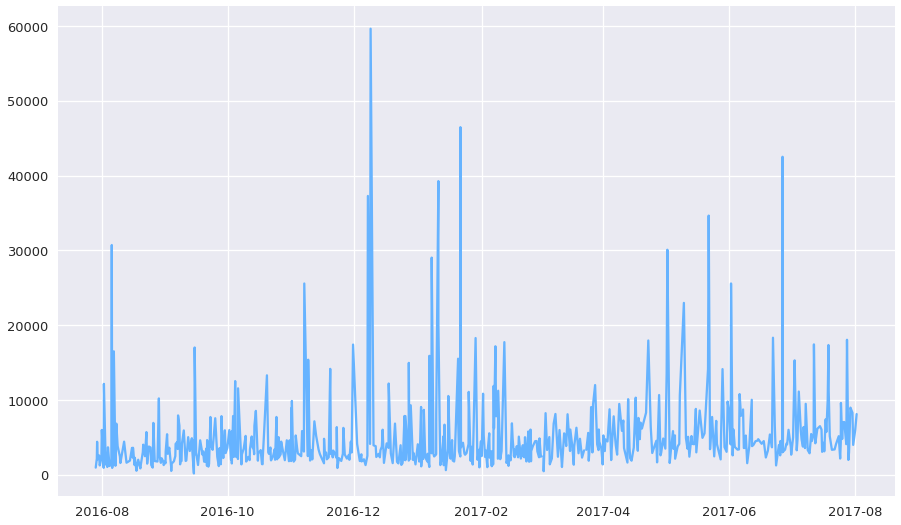

In [124]:
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(archive.timestamp, archive.retweet_count);

In [125]:
weekly_retweet = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweet_count'].sum()\
                    .reset_index().sort_values('timestamp')[:-1]

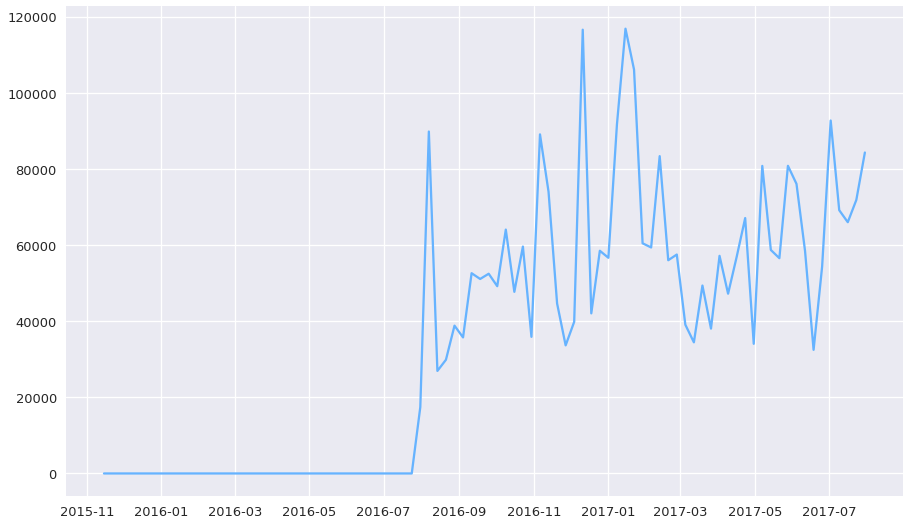

In [126]:
plt.subplots(figsize=(15, 9))
plt.plot(weekly_retweet.timestamp, weekly_retweet.retweet_count);

#### Favorites

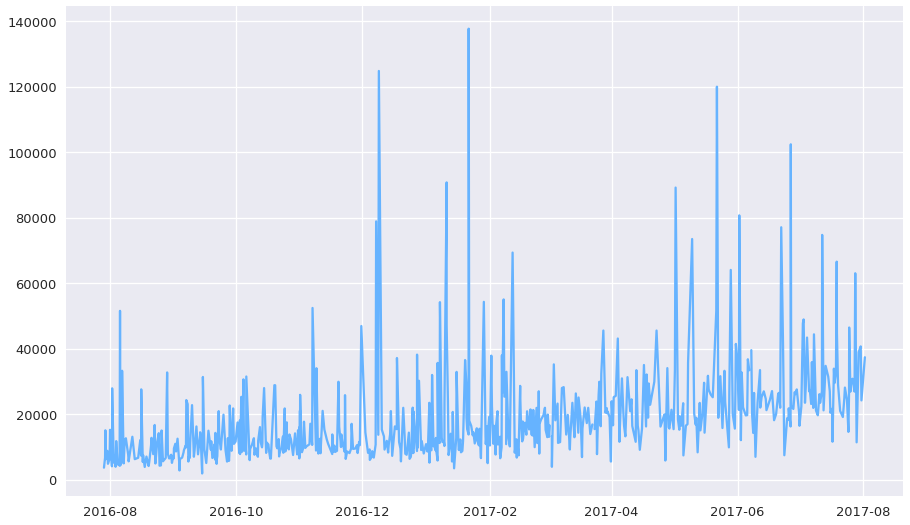

In [127]:
plt.subplots(figsize=(15, 9))
plt.plot(archive.timestamp, archive.favorite_count);

In [128]:
weekly_favorite = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['favorite_count'].sum()\
                    .reset_index().sort_values('timestamp')[:-1]

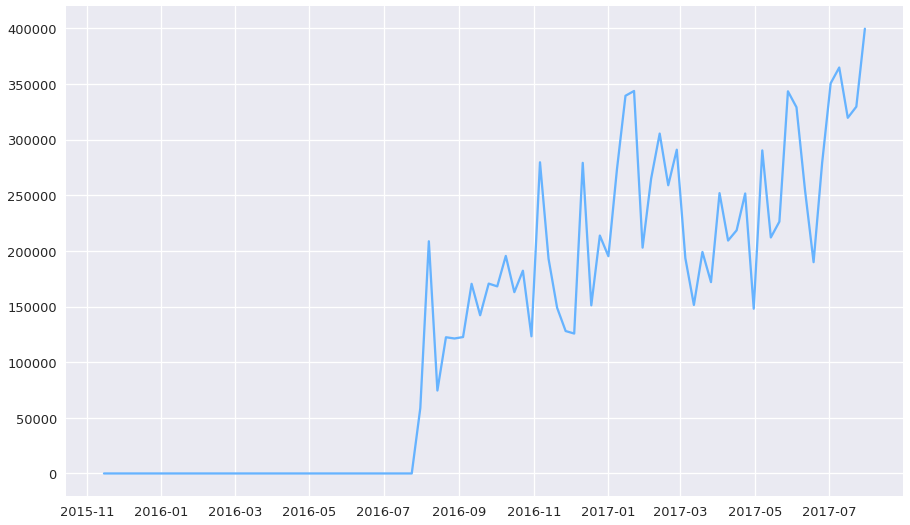

In [129]:
plt.subplots(figsize=(15, 9))
plt.plot(weekly_favorite.timestamp, weekly_favorite.favorite_count);

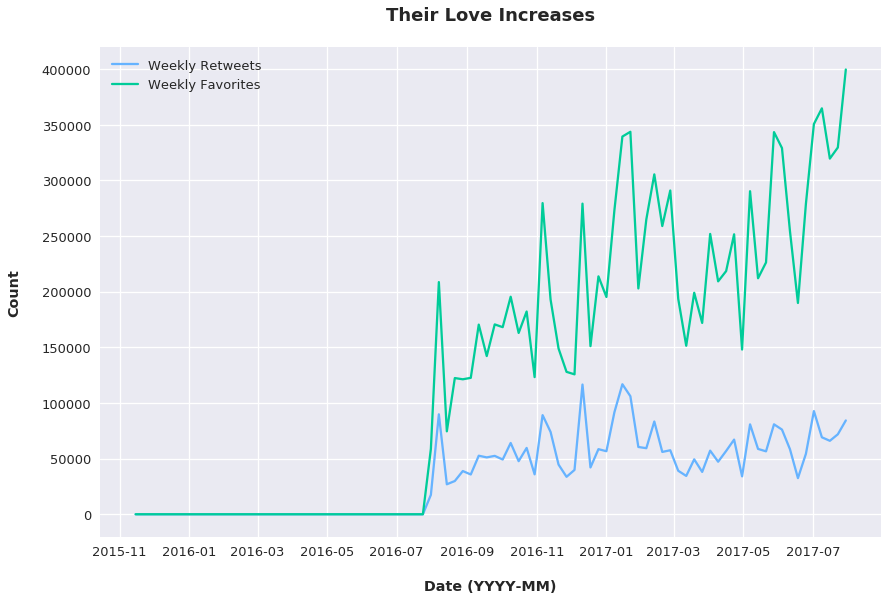

In [130]:
sns.set_context("talk")
plt.subplots(figsize=(14, 9))
plt.plot(weekly_retweet.timestamp, weekly_retweet.retweet_count, label="Weekly Retweets")
plt.plot(weekly_favorite.timestamp, weekly_favorite.favorite_count, label="Weekly Favorites")
plt.title('Their Love Increases\n', fontsize=18, weight='bold')
plt.xlabel('\nDate (YYYY-MM)', weight='bold')
plt.ylabel('Count\n', weight='bold')
plt.legend();
plt.savefig('love-increases.png')

### Dog Types

In [131]:
dog_counts = archive.groupby('dog_type')['tweet_id'].count()
dog_counts

dog_type
doggo       66
floofer      3
pupper     225
puppo       28
Name: tweet_id, dtype: int64

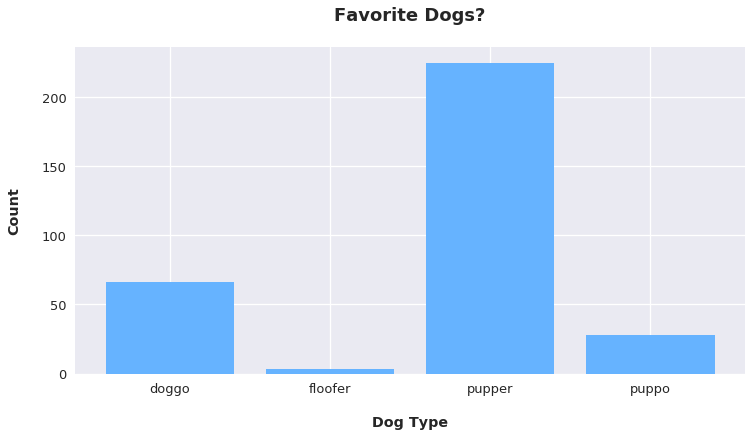

In [132]:
sns.set_context("talk")
plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4], dog_counts, tick_label=['doggo', 'floofer', 'pupper', 'puppo'])
plt.title('Favorite Dogs?\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('Count\n', weight='bold');
plt.savefig('favorite-dogs.png')

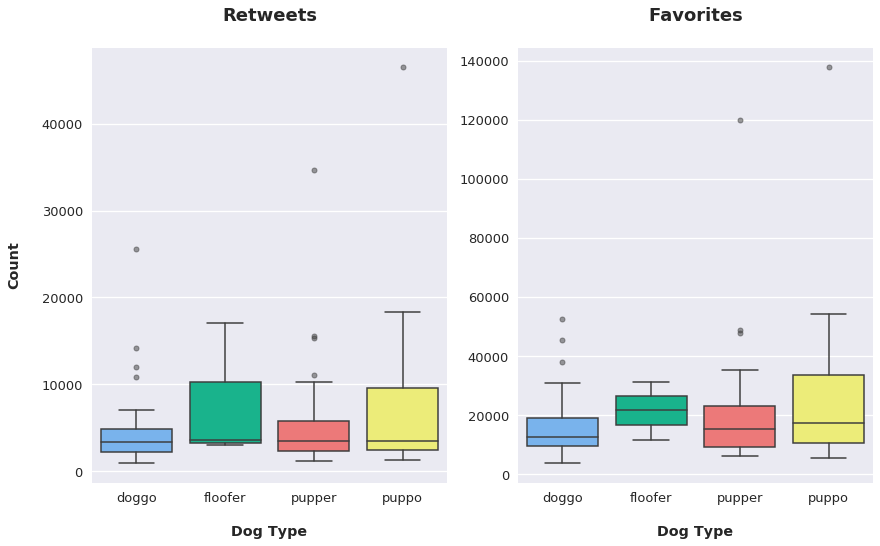

In [133]:
# Set outlier style
flierprops = dict(marker='o', alpha=0.5, markeredgewidth=1)

plt.subplots(figsize=(14, 8))
plt.subplot(121)
sns.boxplot(x=archive.dog_type, y=archive.retweet_count, flierprops=flierprops, linewidth=1.5)
plt.title('Retweets\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('Count\n', weight='bold');

plt.subplot(122)
sns.boxplot(x=archive.dog_type, y=archive.favorite_count, flierprops=flierprops, linewidth=1.5)
plt.title('Favorites\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('');
plt.savefig('boxplot.png')

### Highest Rated

#### Retweets

In [134]:
# Get index
ind = archive.retweet_count.nlargest(5).index
# Get details
high_retweet = archive[['tweet_id', 'text', 'name', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator', 'dog_type']].iloc[ind]
high_retweet

,tweet_id,text,name,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_type
397,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,59633.0,124818.0,13.0,10.0,NaN
306,822872901745569793,Here's a super supportive puppo participating ...,NaN,46465.0,137725.0,13.0,10.0,puppo
58,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,Duddles,42506.0,102421.0,13.0,10.0,NaN
330,819004803107983360,This is Bo. He was a very good First Doggo. 14...,Bo,39255.0,90791.0,14.0,10.0,NaN
399,806629075125202948,"""Good afternoon class today we're going to lea...",NaN,37268.0,78883.0,13.0,10.0,NaN


In [135]:
high_retweet.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator
count,5.000000,5.000000,5.000000,5.0
mean,45025.400000,106927.600000,13.200000,10.0
std,8878.014604,24164.773696,0.447214,0.0
min,37268.000000,78883.000000,13.000000,10.0
25%,39255.000000,90791.000000,13.000000,10.0
50%,42506.000000,102421.000000,13.000000,10.0
75%,46465.000000,124818.000000,13.000000,10.0
max,59633.000000,137725.000000,14.000000,10.0


### Predictions

#### How Confident

In [136]:
confidence = predictions.groupby('prediction_order')['confidence']

In [137]:
confidence.mean()

prediction_order
1    0.594558
2    0.134585
3    0.060166
Name: confidence, dtype: float64

In [138]:
confidence.median()

prediction_order
1    0.587764
2    0.117397
3    0.049444
Name: confidence, dtype: float64

In [139]:
confidence.std()

prediction_order
1    0.272126
2    0.101053
3    0.050942
Name: confidence, dtype: float64

In [140]:
confidence.mean() - confidence.std()

prediction_order
1    0.322431
2    0.033532
3    0.009224
Name: confidence, dtype: float64

In [141]:
confidence.mean() + confidence.std()

prediction_order
1    0.866684
2    0.235638
3    0.111107
Name: confidence, dtype: float64

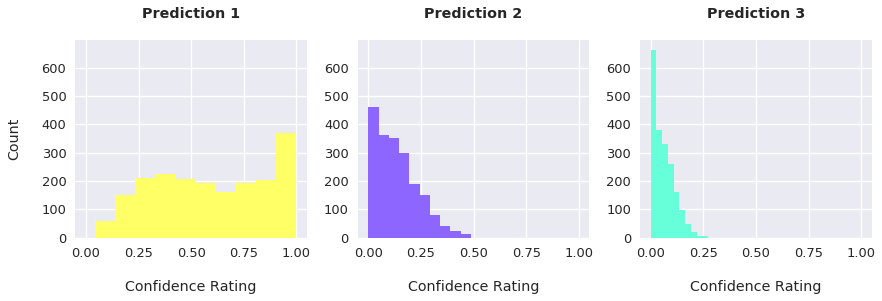

In [142]:
sns.FacetGrid(predictions, col="prediction_order", hue="prediction_order", palette=my_palette[3:], size=4)\
    .map(plt.hist, "confidence")\
    .set_titles("Prediction {col_name}\n", weight='bold', fontsize=14)\
    .set_axis_labels("\nConfidence Rating", "Count\n");
plt.savefig('confidence.png')

In [143]:
samples = predictions.query('prediction_order == 1').sample(5)
samples

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
3795,751132876104687617,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,1,Labrador_retriever,0.929390,True
1551,676617503762681856,https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg,1,1,Chihuahua,0.841084,True
2568,697943111201378304,https://pbs.twimg.com/media/Ca-XjfiUsAAUa8f.jpg,1,1,Great_Dane,0.126924,True
3135,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,1,nail,0.855552,False
4995,822975315408461824,https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg,1,1,bathtub,0.331098,False
